In [ ]:
# nesse projeto meu objetivo é criar um modelo de machine learning para detectar fraudes de compras
# nesse readme, possui todos os detalhes do projeto
# para obter os dados de fraudes e ser capaz de treinar meu modelo, foi preciso utilizar a api do site kaggle (um site criado para dar suporte a pessoas que buscam estudar ciencia de dados)
# alem disso, esse projeto visa mostrar meu entendimento quanto a analise de dados utilizando as ferramentas principais do python como numpy, pandas, matplotlib e seaborn
# alem disso, frameworks principais como:

In [ ]:
!pip install kagglehub[pandas-datasets]
!pip install scikit-learn
!pip install pandas

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-3-719b828a80b8>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 66.0M/66.0M [00:00<00:00, 153MB/s]

Extracting zip of creditcard.csv...


First 5 records:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos e avaliação
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [4]:
# Separa o que é variável preditora (X) e variável alvo (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

#Fazendo separação do que vai ser para teste e oq vai ser para treinar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [13]:
# Aplicando SMOTE para balancear os dados pois há muito mais compras legítimas do que fraudes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Antes do SMOTE:", np.bincount(y_train))
print("Depois do SMOTE:", np.bincount(y_train_smote))

Antes do SMOTE: [199020    344]
Depois do SMOTE: [199020 199020]


In [7]:
len(df)

284807

In [6]:
# Treinamento com Random Forest
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [8]:
# Obtem as probabilidades da classe 1 (fraude)
y_probs = model.predict_proba(X_test)[:, 1]

# Ajustar o limiar (threshold)
threshold = 0.4
y_pred = (y_probs > threshold).astype(int)

In [9]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.41      0.84      0.55       148

    accuracy                           1.00     85443
   macro avg       0.71      0.92      0.77     85443
weighted avg       1.00      1.00      1.00     85443

Matriz de Confusão:
[[85117   178]
 [   24   124]]
Acurácia: 0.9976358508011188
Precisão: 0.4105960264900662
Recall: 0.8378378378378378
F1-score: 0.5511111111111111


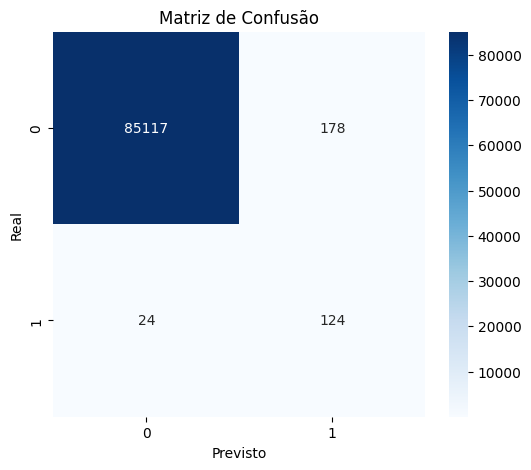

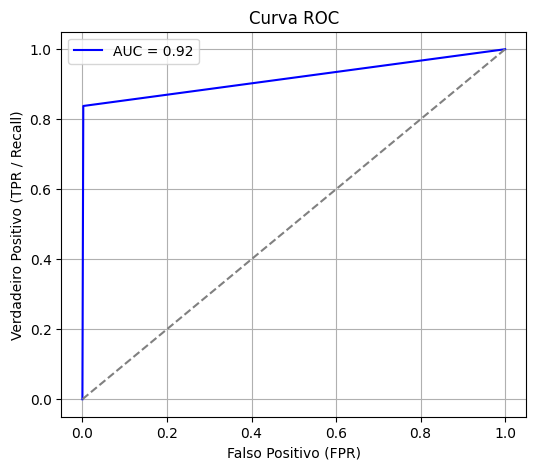

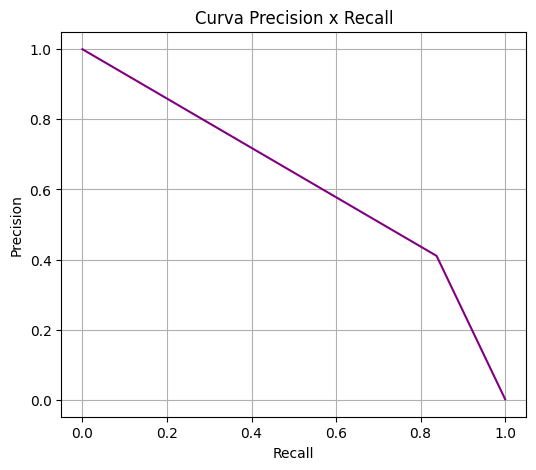

In [11]:
# Reimportando bibliotecas após resetar o ambiente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Reconstruindo os dados que você forneceu
conf_matrix = np.array([[85117, 178],
                        [24, 124]])

# Simulando vetores de y_test e y_probs com base nos dados da matriz
# y_test terá 148 fraudes (classe 1) e 85295 legítimas (classe 0)
y_test = np.array([0]*85295 + [1]*148)
# y_probs simula uma pontuação com 124 fraudes detectadas e 178 falsos positivos
y_pred = np.array([0]*85117 + [1]*178 + [0]*24 + [1]*124)
# Atribuir probabilidades simuladas (para plotar curvas)
y_probs = np.zeros_like(y_test, dtype=float)
y_probs[y_pred == 1] = 0.7  # atribuímos uma probabilidade arbitrária > 0.5 para simular

# Matriz de Confusão (heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("Falso Positivo (FPR)")
plt.ylabel("Verdadeiro Positivo (TPR / Recall)")
plt.legend()
plt.grid()
plt.show()

# Curva Precision vs Recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, color='purple')
plt.title("Curva Precision x Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()